In [1]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def read_frames_from_csv(filename):
    frames = []
    current_frame = []

    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:  # Blank row signals new frame
                if current_frame:
                    frames.append(np.array(current_frame, dtype=float))
                    current_frame = []
            else:
                current_frame.append([float(x) for x in row])

        # Add the last frame if file didn't end with a blank line
        if current_frame:
            frames.append(np.array(current_frame, dtype=float))

    return frames

# Usage
distance_matrices = read_frames_from_csv('distance_matrices.csv')
clusteriness_matrices = read_frames_from_csv('clusteriness_matrices.csv')
acceleration_clusteriness_matrices = read_frames_from_csv('acceleration_clusteriness_matrices.csv')

[75.18861532 64.58494274  3.72260354 ...  5.81568551  4.24392757
  0.22820447]


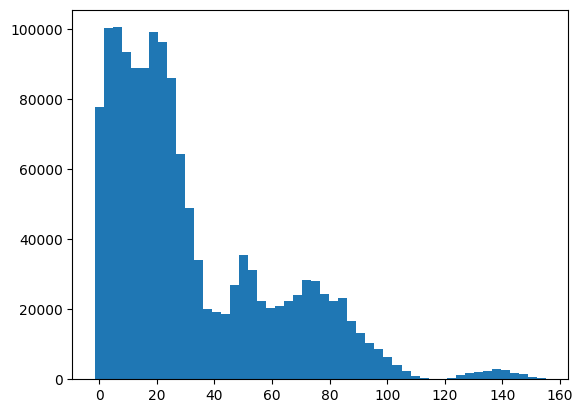

In [16]:
all_distances = np.array(distance_matrices)
all_distances = all_distances.flatten()
all_distances = all_distances[all_distances != 0]

print(all_distances)

sns.histplot(
    all_distances,
    
)
"""
counts, bins = np.histogram(all_distances, bins=50)
plt.bar(bins[:-1], counts, width=np.diff(bins))
"""
plt.show()


In [4]:
all_clusteriness = np.array(clusteriness_matrices)
all_clusteriness = all_distances.flatten()

sns.histplot(
    all_clusteriness,
    kde=True,
)

In [3]:
# average distances

distance_means = []
for matrix in distance_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    distance_means.append(mean)

distance_means = np.array(distance_means)
inverse_distance_means = 1 / distance_means


# minimum distances
max_inv_dist_means = []
for matrix in distance_matrices:
    max_inv_dists = []
    for row in matrix:
        non_zeros = row[row != 0]
        non_zeros = 1 / non_zeros
        if non_zeros.size != 0:
            max_inv_dist = np.max(non_zeros)
            max_inv_dists.append(max_inv_dist)

    max_inv_dist_means.append(np.mean(max_inv_dists))

max_inverse_distance_means = np.array(max_inv_dist_means)


# average clusteriness

clusteriness_means = []
for matrix in clusteriness_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    clusteriness_means.append(mean)

clusteriness_means = np.array(clusteriness_means)


# max clusteriness 

max_clusteriness_means = []
for matrix in clusteriness_matrices:
    max_clusterinesses = []
    for row in matrix:
        non_zeros = row[row != 0]
        if non_zeros.size != 0:
            max_clusteriness = np.max(non_zeros)
            max_clusterinesses.append(max_clusteriness)

    max_clusteriness_means.append(np.mean(max_clusterinesses))

max_clusteriness_means = np.array(max_clusteriness_means)


# average acceleration_clusteriness

acceleration_clusteriness_means = []
for matrix in acceleration_clusteriness_matrices:
    non_zero_values = matrix[matrix != 0]
    mean = np.mean(non_zero_values)
    acceleration_clusteriness_means.append(mean)

acceleration_clusteriness_means = np.array(acceleration_clusteriness_means)


# max acceleration_clusteriness 

max_acceleration_clusteriness_means = []
for matrix in acceleration_clusteriness_matrices:
    max_acceleration_clusterinesses = []
    for row in matrix:
        non_zeros = row[row != 0]
        if non_zeros.size != 0:
            max_acceleration_clusteriness = np.max(non_zeros)
            max_acceleration_clusterinesses.append(max_acceleration_clusteriness)

    max_acceleration_clusteriness_means.append(np.mean(max_acceleration_clusterinesses))

max_acceleration_clusteriness_means = np.array(max_acceleration_clusteriness_means)



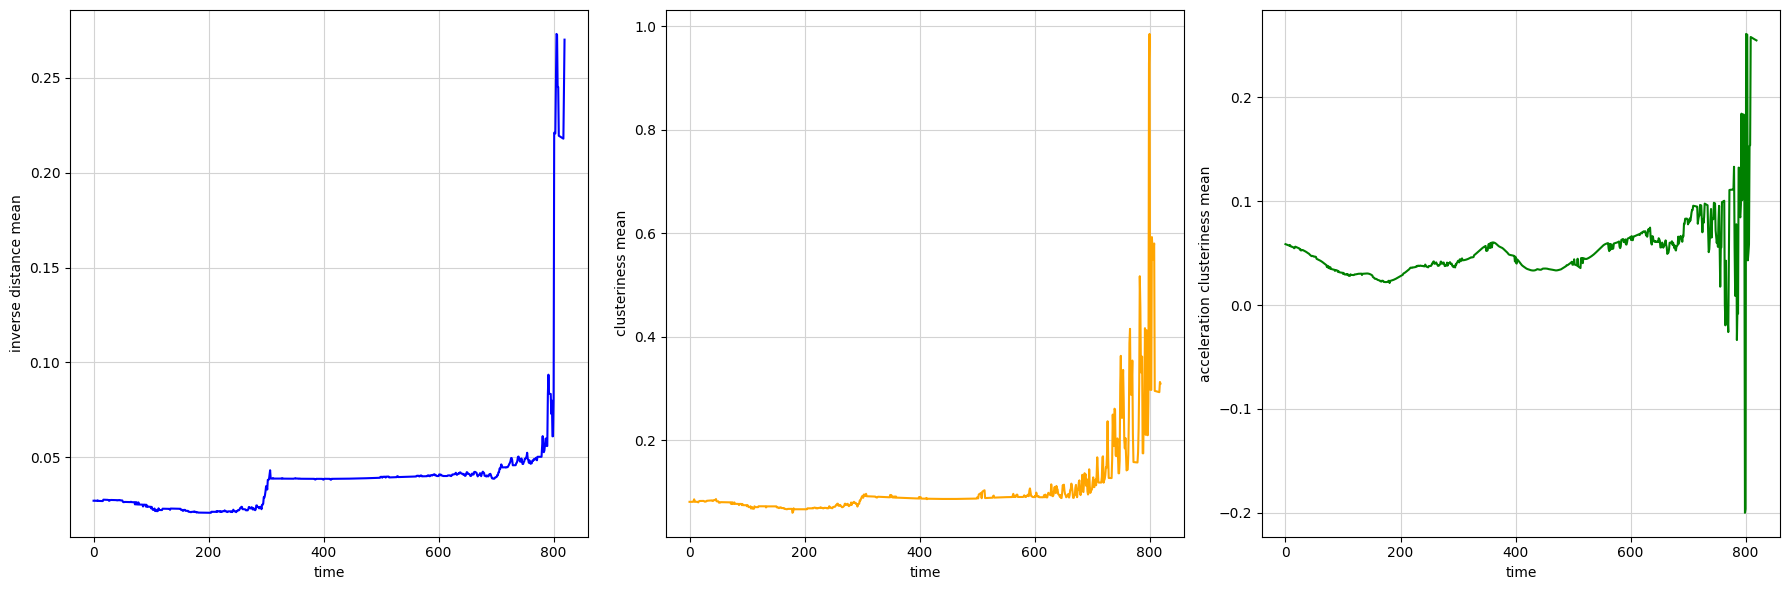

In [4]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(inverse_distance_means))],
    y=inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(clusteriness_means))],
    y=clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('clusteriness mean')
ax2.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(acceleration_clusteriness_means))],
    y=acceleration_clusteriness_means,
    color='green',
    ax=ax3
)

ax3.set_xlabel('time') 
ax3.set_ylabel('acceleration clusteriness mean')
ax3.grid(color='lightgrey')



# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

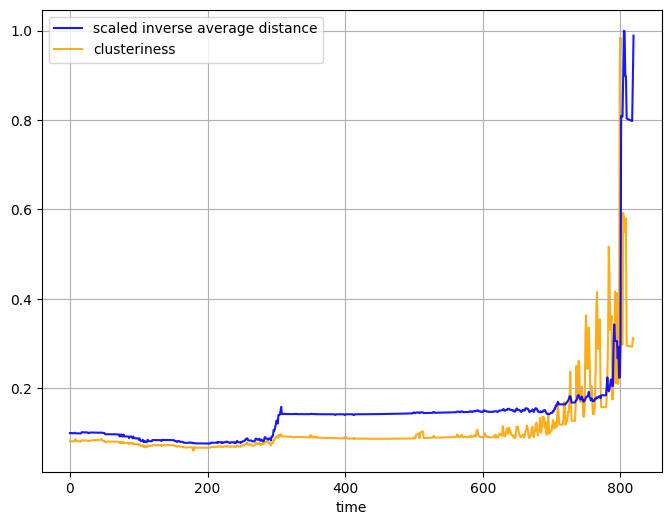

In [5]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y= inverse_distance_means / np.max(inverse_distance_means),
    color='blue',
    alpha=.9,
    label='scaled inverse average distance',
    zorder=2,
)

sns.lineplot(
    x=[i for i in range(len(distance_means))],
    y=clusteriness_means,
    color='orange',
    alpha=.9,
    label='clusteriness',
    zorder=1,
)

plt.xlabel('time')
plt.grid('lightgrey')

plt.show()

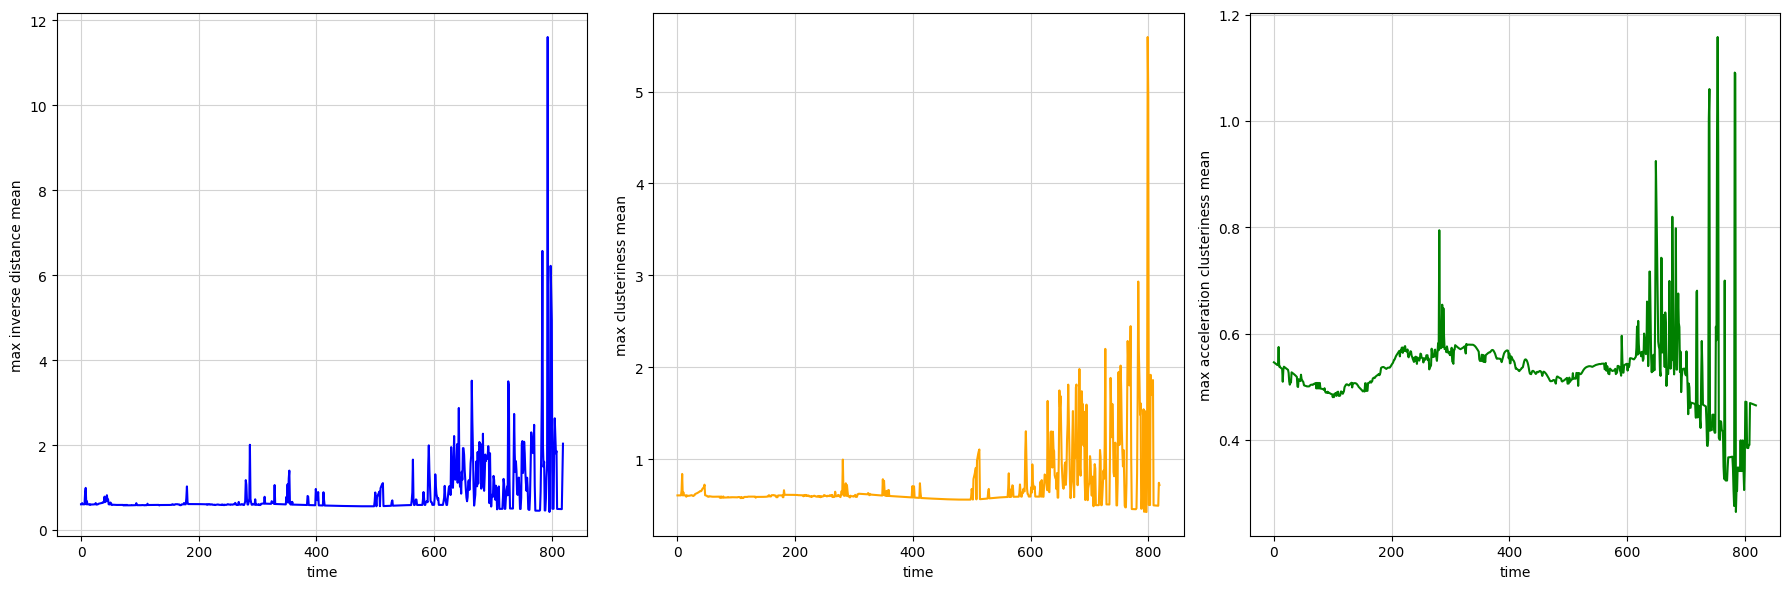

In [6]:
# Create the figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Subplot 1: Scatter Plot (Analogous to Figure S10 A) ---
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Plot the data
sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    ax=ax1
)

ax1.set_xlabel('time') 
ax1.set_ylabel('max inverse distance mean')
ax1.grid(color='lightgrey')

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    ax=ax2
)

ax2.set_xlabel('time') 
ax2.set_ylabel('max clusteriness mean')
ax2.grid(color='lightgrey')


sns.lineplot(
    x=[i for i in range(len(max_acceleration_clusteriness_means))],
    y=max_acceleration_clusteriness_means,
    color='green',
    ax=ax3
)

ax3.set_xlabel('time') 
ax3.set_ylabel('max acceleration clusteriness mean')
ax3.grid(color='lightgrey')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

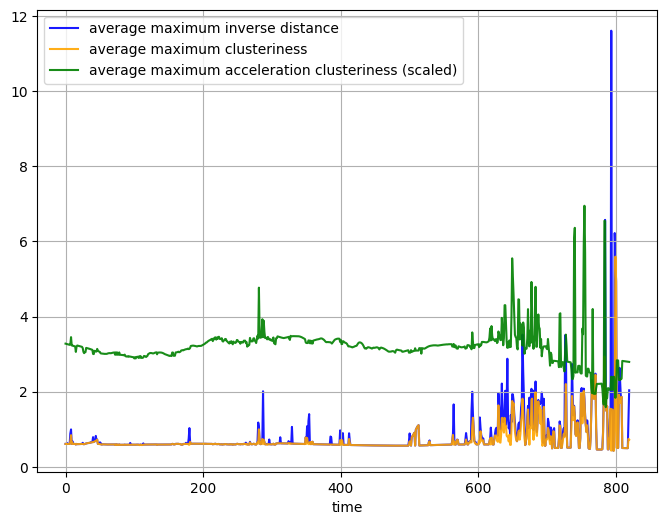

In [7]:
fig = plt.figure(figsize=(8, 6))

sns.lineplot(
    x=[i for i in range(len(max_inverse_distance_means))],
    y=max_inverse_distance_means,
    color='blue',
    alpha=.9,
    label='average maximum inverse distance',
    zorder=1,
)

sns.lineplot(
    x=[i for i in range(len(max_clusteriness_means))],
    y=max_clusteriness_means,
    color='orange',
    alpha=.9,
    label='average maximum clusteriness',
    zorder=2,
)

sns.lineplot(
    x=[i for i in range(len(max_acceleration_clusteriness_means))],
    y=max_acceleration_clusteriness_means * 6,
    color='green',
    alpha=.9,
    label='average maximum acceleration clusteriness (scaled)',
    zorder=3,
)


plt.xlabel('time')
plt.grid('lightgrey')

plt.show()

We want to use some kind of measure to evaluate if two birds were in a flock. For this we could use the average distance or the average distance deviation / total distance deviation between two birds.

**We will first try the average distance**

In [8]:
# birds spent time together when their distance is not 0
number_of_frames_birds_spent_simultaneously = np.zeros(distance_matrices[0].shape)

for matrix in distance_matrices:
    for i in range(number_of_frames_birds_spent_simultaneously.shape[0]):
        for j in range(number_of_frames_birds_spent_simultaneously.shape[1]):
            if matrix[i][j] != 0:
                number_of_frames_birds_spent_simultaneously[i][j] += 1

# replace 0 values by infinity to avoid division errors
for i in range(number_of_frames_birds_spent_simultaneously.shape[0]):
    for j in range(number_of_frames_birds_spent_simultaneously.shape[1]):
        if number_of_frames_birds_spent_simultaneously[i][j] == 0:
            number_of_frames_birds_spent_simultaneously[i][j] = np.inf



# compute average distances between birds
average_distances_between_birds = np.zeros(distance_matrices[0].shape)

for matrix in distance_matrices:
    average_distances_between_birds += matrix


average_distances_between_birds = average_distances_between_birds / number_of_frames_birds_spent_simultaneously

# compute average inverse distances
shortened_average_distances_between_birds = average_distances_between_birds[average_distances_between_birds != 0]
average_inverse_distances_between_birds = 1 /  shortened_average_distances_between_birds

# compute average clusteriness of two birds
average_clusteriness_between_birds = np.zeros(clusteriness_matrices[0].shape)

for matrix in clusteriness_matrices:
    average_clusteriness_between_birds += matrix

average_clusteriness_between_birds = average_clusteriness_between_birds / number_of_frames_birds_spent_simultaneously


# compute average clusteriness of two birds
average_acceleration_clusteriness_between_birds = np.zeros(clusteriness_matrices[0].shape)

for matrix in acceleration_clusteriness_matrices:
    average_acceleration_clusteriness_between_birds += matrix

average_acceleration_clusteriness_between_birds = average_acceleration_clusteriness_between_birds / number_of_frames_birds_spent_simultaneously


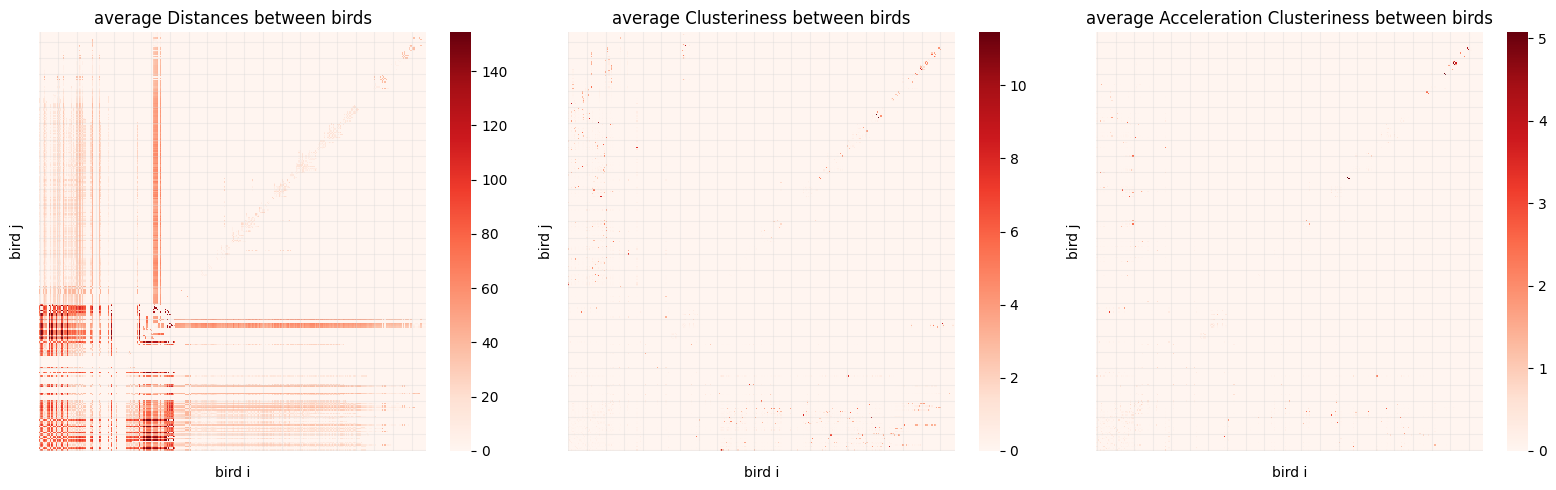

In [9]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

sns.heatmap(
    data=average_distances_between_birds,
    ax=ax[0],
    cmap='Reds'
)

ax[0].set_title('average Distances between birds')
ax[0].invert_yaxis()
ax[0].set_xlabel('bird i')
ax[0].set_ylabel('bird j')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].grid(color='lightgrey', alpha=0.3)
ax[0].tick_params(left=False, bottom=False)

sns.heatmap(
    data=average_clusteriness_between_birds,
    ax=ax[1],
    cmap='Reds',
    vmin=0,
)

ax[1].set_title('average Clusteriness between birds')
ax[1].invert_yaxis()

ax[1].set_xlabel('bird i')
ax[1].set_ylabel('bird j')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].grid(color='lightgrey', alpha=0.3)
ax[1].tick_params(left=False, bottom=False)

sns.heatmap(
    data=average_acceleration_clusteriness_between_birds,
    ax=ax[2],
    cmap='Reds',
    vmin=0,
)

ax[2].set_title('average Acceleration Clusteriness between birds')
ax[2].invert_yaxis()
ax[2].set_xlabel('bird i')
ax[2].set_ylabel('bird j')
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].grid(color='lightgrey', alpha=0.3)
ax[2].tick_params(left=False, bottom=False)

plt.tight_layout()


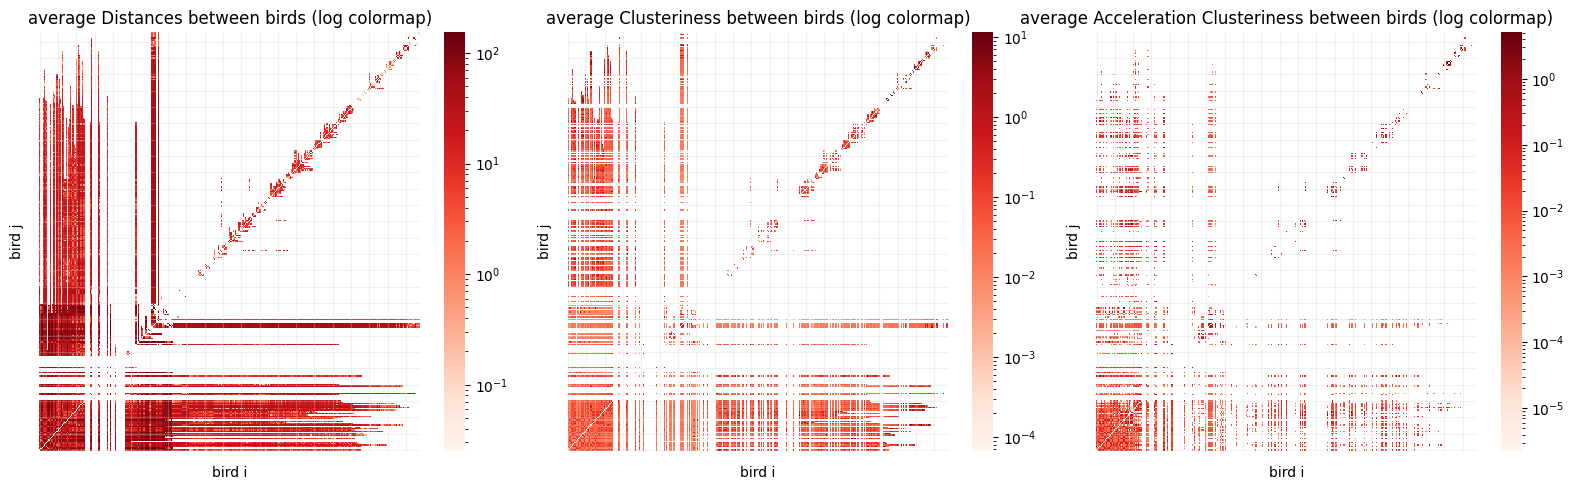

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

sns.heatmap(
    data=average_distances_between_birds,
    ax=ax[0],
    cmap='Reds',
    norm=LogNorm(),
)

ax[0].set_title('average Distances between birds (log colormap)')
ax[0].invert_yaxis()
ax[0].set_xlabel('bird i')
ax[0].set_ylabel('bird j')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].grid(color='lightgrey', alpha=0.3)
ax[0].tick_params(left=False, bottom=False)

# clusteriness

sns.heatmap(
    data=average_clusteriness_between_birds,
    ax=ax[1],
    cmap='Reds',
    vmin=0,
    norm=LogNorm(),
)

ax[1].set_title('average Clusteriness between birds (log colormap)')
ax[1].invert_yaxis()

ax[1].set_xlabel('bird i')
ax[1].set_ylabel('bird j')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].grid(color='lightgrey', alpha=0.3)
ax[1].tick_params(left=False, bottom=False)

# acceleration clusteriness
sns.heatmap(
    data=average_acceleration_clusteriness_between_birds,
    ax=ax[2],
    cmap='Reds',
    vmin=0,
    norm=LogNorm(),
)

ax[2].set_title('average Acceleration Clusteriness between birds (log colormap)')
ax[2].invert_yaxis()
ax[2].set_xlabel('bird i')
ax[2].set_ylabel('bird j')
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].grid(color='lightgrey', alpha=0.3)
ax[2].tick_params(left=False, bottom=False)

plt.tight_layout()

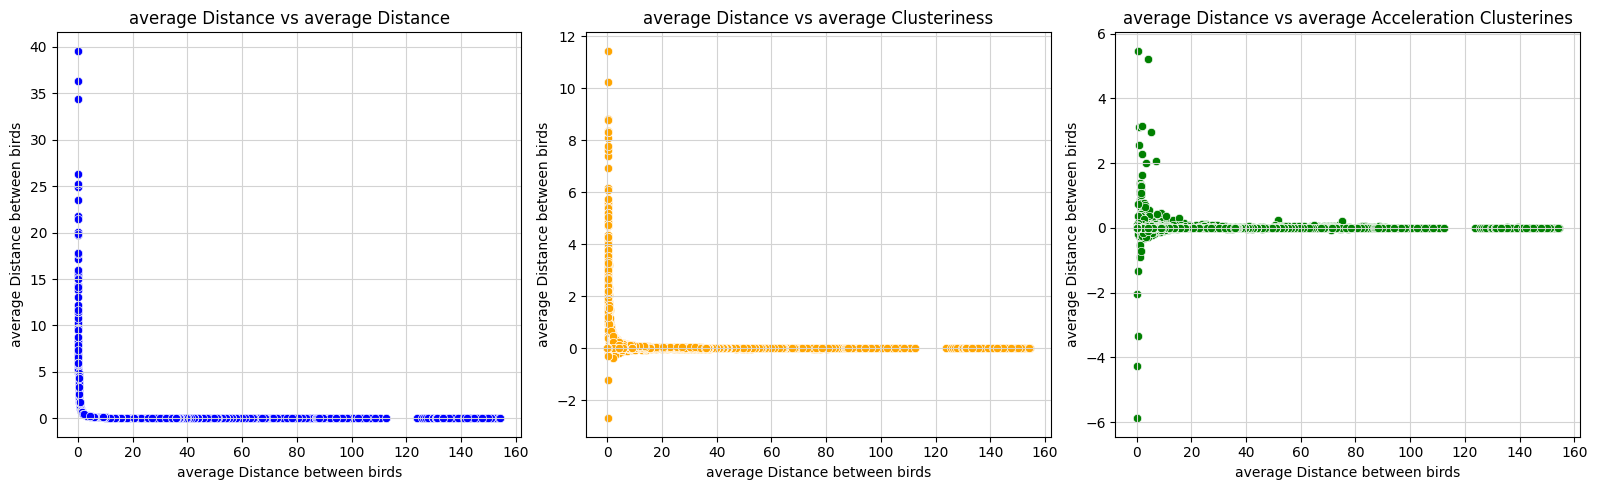

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
# figure showing the correlation between average distance and function

# dummy plot I guess
sns.scatterplot(
    x=shortened_average_distances_between_birds.flatten(),
    y=average_inverse_distances_between_birds.flatten(),
    ax=ax[0],
    zorder=1,
    color='blue',
)
ax[0].set_xlabel('average Distance between birds')
ax[0].set_ylabel('average Distance between birds')
ax[0].set_title('average Distance vs average Distance')
ax[0].grid(color='lightgrey')


# clusteriness
sns.scatterplot(
    x=average_distances_between_birds.flatten(),
    y=average_clusteriness_between_birds.flatten(),
    ax=ax[1],
    zorder=1,
    color='orange',
)
ax[1].set_xlabel('average Distance between birds')
ax[1].set_ylabel('average Distance between birds')
ax[1].set_title('average Distance vs average Clusteriness')
ax[1].grid(color='lightgrey')

# acceleration clusteriness
sns.scatterplot(
    x=average_distances_between_birds.flatten(),
    y=average_acceleration_clusteriness_between_birds.flatten(),
    ax=ax[2],
    zorder=1,
    color='green',
)
ax[2].set_xlabel('average Distance between birds')
ax[2].set_ylabel('average Distance between birds')
ax[2].set_title('average Distance vs average Acceleration Clusterines')
ax[2].grid(color='lightgrey')


plt.tight_layout()

now compare momentary values of distance, clusteriness and acceleration clusteriness vs average distance

In [12]:
from tqdm import trange
data = []

for frame in trange(len(distance_matrices)):
    for i in range(average_distances_between_birds.shape[0]):
        for j in range(average_distances_between_birds.shape[1]):
            if i != j:
                distance = distance_matrices[frame][i][j]
                clusteriness = clusteriness_matrices[frame][i][j]
                acceleration_clusteriness = clusteriness_matrices[frame][i][j]

                average_distance = average_distances_between_birds[i][j]

                data_in_dict = {
                    'trj_1': i,
                    'trj_2': j,
                    'distance': distance,
                    'clusteriness': clusteriness,
                    'acceleration_clusteriness': acceleration_clusteriness,
                    'average_distance': average_distance,
                    }

                data.append(data_in_dict)
                

100%|██████████| 820/820 [02:29<00:00,  5.50it/s]


In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(
    x=[item['average_distance'] for item in data],
    y=[item['distance'] for item in data],
    color='blue',
    zorder=1, 
    ax=ax[0],
)

ax[1].set_xlabel('average distance')
ax[1].set_ylabel('distance')
ax[0].grid(color='lightgrey')
ax[0].set_title('Average Distance vs Distance')

sns.scatterplot(
    x=[item['average_distance'] for item in data],
    y=[item['clusteriness'] for item in data],
    color='orange',
    zorder=1, 
    ax=ax[1],
)

ax[1].set_xlabel('average distance')
ax[1].set_ylabel('clusteriness')
ax[1].grid(color='lightgrey')
ax[1].set_title('Average Distance vs Clusteriness')

sns.scatterplot(
    x=[item['average_distance'] for item in data],
    y=[item['acceleration_clusteriness'] for item in data],
    color='green',
    zorder=1, 
    ax=ax[2],
)

ax[2].set_xlabel('average distance')
ax[2].set_ylabel('acceleration clusteriness')
ax[2].grid(color='lightgrey')
ax[2].set_title('Average Distance vs Acceleration Clusteriness')


plt.tight_layout()